In [1]:
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import json

# preprocess and making data

## make instances dictionary

In [2]:
DATA_PATH = r'C:\Users\uefav\Desktop\Beca\Data_Out'  
instance_names = np.array(os.listdir(DATA_PATH))
print(type(instance_names))
print(len(instance_names))
print(instance_names)

instances_dict = {}
for i, j in enumerate(instance_names):
  instances_dict[i] = j
print(instances_dict)

<class 'numpy.ndarray'>
72
['HF008_V2' 'HF009_V2' 'HF010_V2' 'HF011_V2' 'HF012_V2' 'HF015_V2'
 'HF016_V2' 'HF026_V2' 'HF027_V2' 'HF030_V2' 'HF031_V2' 'HF032_V2'
 'HF033_V2' 'HG001_V2' 'HG002_V2' 'HG003_V2' 'HG004_V2' 'HG005_V2'
 'HG005_V3' 'HG006_V2' 'HG008_V2' 'HG009_V2' 'HG010_V2' 'HG011_V2'
 'HG012_V2' 'HG014_V2' 'HG015_V2' 'HG016_V2' 'HG017_V2' 'HG018_V2'
 'HG019_V2' 'HG021_V2' 'HG022_V2' 'HG023_V2' 'HG024_V2' 'HG025_V2'
 'HG027_V2' 'HG028_V2' 'HG029_V2' 'HG030_V2' 'HG031_V2' 'HG032_V2'
 'HG034_V2' 'HG035_V2' 'HG036_V2' 'HG037_V2' 'HG038_V2' 'HG039_V2'
 'HG041_V2' 'HG043_V2' 'HG044_V2' 'HG047_V2' 'HG048_V2' 'HG049_V2'
 'HG050_V2' 'HG051_V2' 'HG052_V2' 'HG053_v2' 'HG054_V2' 'HG055_V2'
 'HG058_V2' 'HG060_V2' 'HG061_V2' 'HG063_V2' 'HG064_V2' 'HG065_V2'
 'HG066_V2' 'HG067_V2' 'HG069_V2' 'HG072_V2' 'HG073_V2' 'HG074_V2']
{0: np.str_('HF008_V2'), 1: np.str_('HF009_V2'), 2: np.str_('HF010_V2'), 3: np.str_('HF011_V2'), 4: np.str_('HF012_V2'), 5: np.str_('HF015_V2'), 6: np.str_('HF016_V2'),

In [3]:
NEW_DATA_PATH = 'instances_dict.json'
with open(NEW_DATA_PATH, 'w') as f:
    json.dump(instances_dict, f)

## utility functions

In [5]:
def mask_null_values(signal, event):
  signal_length = len(signal)

  for index, row in event.iterrows():
      if row['value'] == 2:
          start_index = row['start']
          end_index = row['end']

          signal[start_index:end_index + 1] = [np.nan] 

  return signal

In [7]:
def mask_Artificail_null_values(signal, event):
  signal_length = len(signal)

  for index, row in event.iterrows():
      if row['value'] == 5:
          start_index = row['start']
          end_index = row['end']

          signal[start_index:end_index + 1] = [np.nan] 

  return signal

In [11]:
def align_length(signal):
    if len(signal) < 15000:
        num = 15000 - len(signal)
        # signal = np.pad(signal, (0, num), mode='edge')
        signal = np.pad(signal, (0, num), mode='constant', constant_values=0)
    elif len(signal) >= 15000:
        signal = signal[:15000]
    return signal

In [9]:
def remove_outlier(signal):
    mean = np.nanmean(signal)
    std = np.nanstd(signal)
    threshold = mean + 2 * std
    
    # Clamp values above positive threshold
    signal = np.where(signal > threshold, threshold, signal)
    
    # Clamp values below negative threshold
    signal = np.where(signal < -threshold, -threshold, signal)
    
    return signal

## Nistagamo_1_4

In [16]:
Nistagmo_1_4 = []
ex_1 = ['Nistagmo_1', 'Nistagmo_1', 'Nistagmo_1', 'Nistagmo_1']

for i in tqdm(instance_names, desc='extracting data_Nistagamo_1_4', total=len(instance_names)):
  instance = []
  for j in ex_1:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    np_Lx = np.array(Lx)
    np_Lx = mask_null_values(np_Lx, eventL)
    np_Lx = align_length(np_Lx)
    np_Lx = remove_outlier(np_Lx)

    Rx = sigR.iloc[: , 0].tolist()
    np_Rx = np.array(Rx)
    np_Rx = mask_null_values(np_Rx, eventR)
    np_Rx = align_length(np_Rx)
    np_Rx = remove_outlier(np_Rx)

    targetx = target.iloc[: , 0].tolist()
    np_targetx = np.array(targetx)
    np_targetx = align_length(np_targetx)

    result = [np_Lx, np_Rx, np_targetx]
    instance.append(result)
  Nistagmo_1_4.append(instance)
Nistagmo_1_4= np.array(Nistagmo_1_4)

extracting data_Nistagamo_1_4:   0%|          | 0/72 [00:00<?, ?it/s]

In [17]:
Nistagmo_1_4_Ar = []
ex_1 = ['Nistagmo_1', 'Nistagmo_2', 'Nistagmo_3', 'Nistagmo_4']

for i in tqdm(instance_names, desc='extracting data_Nistagmo_1_4', total=len(instance_names)):
  instance = []
  for j in ex_1:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    np_Lx = np.array(Lx)
    np_Lx = mask_Artificail_null_values(np_Lx, eventL)
    np_Lx = align_length(np_Lx)
    np_Lx = remove_outlier(np_Lx)

    Rx = sigR.iloc[: , 0].tolist()
    np_Rx = np.array(Rx)
    np_Rx = mask_Artificail_null_values(np_Rx, eventR)
    np_Rx = align_length(np_Rx)
    np_Rx = remove_outlier(np_Rx)

    targetx = target.iloc[: , 0].tolist()
    np_targetx = np.array(targetx)
    np_targetx = align_length(np_targetx)

    result = [np_Lx, np_Rx, np_targetx]
    instance.append(result)
  Nistagmo_1_4_Ar.append(instance)
Nistagmo_1_4_Ar = np.array(Nistagmo_1_4_Ar)

extracting data_Nistagmo_1_4:   0%|          | 0/72 [00:00<?, ?it/s]

In [18]:
np.save(r'C:\Users\uefav\Desktop\Beca\Data_Out\Nistagmo_1_4', Nistagmo_1_4)
np.save(r'C:\Users\uefav\Desktop\Beca\Data_Out\Nistagmo_1_4_Ar', Nistagmo_1_4_Ar)

In [20]:
print(len(Nistagmo_1_4))
print(type(Nistagmo_1_4))
print(Nistagmo_1_4.shape)

72
<class 'numpy.ndarray'>
(72, 4, 3, 15000)


In [21]:
print(len(Nistagmo_1_4_Ar))
print(type(Nistagmo_1_4_Ar))
print(Nistagmo_1_4_Ar.shape)

72
<class 'numpy.ndarray'>
(72, 4, 3, 15000)


## SmoothPur_5_8

In [23]:
Nistagmo_5_8 = []
ex_2 = ['Nistagmo_5', 'Nistagmo_6', 'Nistagmo_7', 'Nistagmo_8']

for i in tqdm(instance_names, desc='extracting data_Nistagmo_5_8', total=len(instance_names)):
  instance = []
  for j in ex_2:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Ly = sigL.iloc[: , 1].tolist()
    np_Ly = np.array(Ly)
    np_Ly = mask_null_values(np_Ly, eventL)
    np_Ly = align_length(np_Ly)
    np_Ly = remove_outlier(np_Ly)

    Ry = sigR.iloc[: , 1].tolist()
    np_Ry = np.array(Ry)
    np_Ry = mask_null_values(np_Ry, eventR)
    np_Ry = align_length(np_Ry)
    np_Ry = remove_outlier(np_Ry)

    targety = target.iloc[: , 1].tolist()
    np_targety = np.array(targety)
    np_targety = align_length(np_targety)

    result = [np_Ly, np_Ry, np_targety]
    instance.append(result)
  Nistagmo_5_8.append(instance)
Nistagmo_5_8 = np.array(Nistagmo_5_8)

extracting data_Nistagmo_5_8:   0%|          | 0/72 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\uefav\\Desktop\\Beca\\Data_Out\\HF008_V2\\Nistagmo_5/LTS.dat'

In [ ]:
Nistagmo_5_8_Ar = []
ex_2 = ['Nistagmo_5', 'Nistagmo_6', 'Nistagmo_7', 'Nistagmo_8']

for i in tqdm(instance_names, desc='extracting data_Nistagmo_5_8', total=len(instance_names)):
  instance = []
  for j in ex_2:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Ly = sigL.iloc[: , 1].tolist()
    np_Ly = np.array(Ly)
    np_Ly = mask_Artificail_null_values(np_Ly, eventL)
    np_Ly = align_length(np_Ly)
    np_Ly = remove_outlier(np_Ly)

    Ry = sigR.iloc[: , 1].tolist()
    np_Ry = np.array(Ry)
    np_Ry = mask_Artificail_null_values(np_Ry, eventR)
    np_Ry = align_length(np_Ry)
    np_Ry = remove_outlier(np_Ry)

    targety = target.iloc[: , 1].tolist()
    np_targety = np.array(targety)
    np_targety = align_length(np_targety)

    result = [np_Ly, np_Ry, np_targety]
    instance.append(result)
  Nistagmo_5_8_Ar.append(instance)
Nistagmo_5_8_Ar = np.array(Nistagmo_5_8_Ar)

extracting data_SmoothPur_5_8:   0%|          | 0/172 [00:00<?, ?it/s]

In [66]:
np.save('J:/Imputation project/Artificial_data/SmoothPur_5_8', SmoothPur_5_8)
np.save('J:/Imputation project/Artificial_data/SmoothPur_5_8_Ar', SmoothPur_5_8_Ar)

In [67]:
print(len(SmoothPur_5_8))
print(type(SmoothPur_5_8))
print(SmoothPur_5_8.shape)

172
<class 'numpy.ndarray'>
(172, 4, 3, 15000)


In [68]:
print(len(SmoothPur_5_8_Ar))
print(type(SmoothPur_5_8_Ar))
print(SmoothPur_5_8_Ar.shape)

172
<class 'numpy.ndarray'>
(172, 4, 3, 15000)


## SmoothPur_9_10

In [69]:
SmoothPur_9_10 = []
ex_3 = ['SmoothPur_9', 'SmoothPur_10']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_9_10', total=len(instance_names)):
  instance = []
  for j in ex_3:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_null_values(np_Lx, eventL)
    np_Ly = mask_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    np_Lx = remove_outlier(np_Lx)
    np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_null_values(np_Rx, eventR)
    np_Ry = mask_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    np_Rx = remove_outlier(np_Rx)
    np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_9_10.append(instance)
SmoothPur_9_10 = np.array(SmoothPur_9_10)

extracting data_SmoothPur_9_10:   0%|          | 0/172 [00:00<?, ?it/s]

In [70]:
SmoothPur_9_10_Ar = []
ex_3 = ['SmoothPur_9', 'SmoothPur_10']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_9_10', total=len(instance_names)):
  instance = []
  for j in ex_3:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_Artificail_null_values(np_Lx, eventL)
    np_Ly = mask_Artificail_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    np_Lx = remove_outlier(np_Lx)
    np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_Artificail_null_values(np_Rx, eventR)
    np_Ry = mask_Artificail_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    np_Rx = remove_outlier(np_Rx)
    np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_9_10_Ar.append(instance)
SmoothPur_9_10_Ar = np.array(SmoothPur_9_10_Ar)

extracting data_SmoothPur_9_10:   0%|          | 0/172 [00:00<?, ?it/s]

In [71]:
np.save('J:/Imputation project/Artificial_data/SmoothPur_9_10', SmoothPur_9_10)
np.save('J:/Imputation project/Artificial_data/SmoothPur_9_10_Ar', SmoothPur_9_10_Ar)

In [72]:
print(len(SmoothPur_9_10))
print(type(SmoothPur_9_10))
print(SmoothPur_9_10.shape)

172
<class 'numpy.ndarray'>
(172, 2, 3, 2, 15000)


In [73]:
print(len(SmoothPur_9_10_Ar))
print(type(SmoothPur_9_10_Ar))
print(SmoothPur_9_10_Ar.shape)

172
<class 'numpy.ndarray'>
(172, 2, 3, 2, 15000)


## SmoothPur_11_12

In [74]:
SmoothPur_11_12 = []
ex_4 = ['SmoothPur_11', 'SmoothPur_12']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_11_12', total=len(instance_names)):
  instance = []
  for j in ex_4:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_null_values(np_Lx, eventL)
    np_Ly = mask_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    np_Lx = remove_outlier(np_Lx)
    np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_null_values(np_Rx, eventR)
    np_Ry = mask_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    np_Rx = remove_outlier(np_Rx)
    np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_11_12.append(instance)
SmoothPur_11_12 = np.array(SmoothPur_11_12)

extracting data_SmoothPur_11_12:   0%|          | 0/172 [00:00<?, ?it/s]

In [75]:
SmoothPur_11_12_Ar = []
ex_4 = ['SmoothPur_11', 'SmoothPur_12']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_11_12', total=len(instance_names)):
  instance = []
  for j in ex_4:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_Artificail_null_values(np_Lx, eventL)
    np_Ly = mask_Artificail_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    np_Lx = remove_outlier(np_Lx)
    np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_Artificail_null_values(np_Rx, eventR)
    np_Ry = mask_Artificail_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    np_Rx = remove_outlier(np_Rx)
    np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_11_12_Ar.append(instance)
SmoothPur_11_12_Ar = np.array(SmoothPur_11_12_Ar)

extracting data_SmoothPur_11_12:   0%|          | 0/172 [00:00<?, ?it/s]

In [76]:
np.save('J:/Imputation project/Artificial_data/SmoothPur_11_12', SmoothPur_11_12)
np.save('J:/Imputation project/Artificial_data/SmoothPur_11_12_Ar', SmoothPur_11_12_Ar)

In [77]:
print(len(SmoothPur_11_12))
print(type(SmoothPur_11_12))
print(SmoothPur_11_12.shape)

172
<class 'numpy.ndarray'>
(172, 2, 3, 2, 15000)


In [78]:
print(len(SmoothPur_11_12_Ar))
print(type(SmoothPur_11_12_Ar))
print(SmoothPur_11_12_Ar.shape)

172
<class 'numpy.ndarray'>
(172, 2, 3, 2, 15000)


## plot the reslts

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets

def plot_signal_comparison_1_4_5_8(smoothpur_1_4, smoothpur_5_8, 
                                   signal_set_label='Signal Set'):
    def plot_signal(signal_set, signal_idx, idx_1, idx_2):
        if signal_set == 'smoothpur_1_4':
            signal = smoothpur_1_4[signal_idx, idx_1, idx_2]
        elif signal_set == 'smoothpur_5_8':
            signal = smoothpur_5_8[signal_idx, idx_1, idx_2]

        # Plot the signal for the given indices
        plt.figure(figsize=(18, 8))
        plt.plot(signal.flatten(), label=f'{signal_set} Signal', alpha=0.7, color='blue', linewidth=2)
        plt.title(f'Signal Comparison for {signal_set}, Index {signal_idx}, idx_1 {idx_1}, idx_2 {idx_2}')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Create interactive widgets for signal set and index selection
    interact(plot_signal,
             signal_set=widgets.Dropdown(options=['smoothpur_1_4', 'smoothpur_5_8'], 
                                         description=signal_set_label),
             signal_idx=widgets.IntSlider(min=0, max=153, step=1, value=0),
             idx_1=widgets.IntSlider(min=0, max=3, step=1, value=0),
             idx_2=widgets.IntSlider(min=0, max=2, step=1, value=0))

In [25]:
def plot_signal_comparison_9_10_11_12(smoothpur_9_10, smoothpur_11_12, 
                                      signal_set_label='Signal Set'):
    def plot_signal(signal_set, signal_idx, idx_1, idx_2, idx_3):
        if signal_set == 'smoothpur_9_10':
            signal = smoothpur_9_10[signal_idx, idx_1, idx_2, idx_3]
        elif signal_set == 'smoothpur_11_12':
            signal = smoothpur_11_12[signal_idx, idx_1, idx_2, idx_3]

        # Plot the signal for the given indices
        plt.figure(figsize=(18, 8))
        plt.plot(signal.flatten(), label=f'{signal_set} Signal', alpha=0.7, color='blue', linewidth=2)
        plt.title(f'Signal Comparison for {signal_set}, Index {signal_idx}, idx_1 {idx_1}, idx_2 {idx_2}, idx_3 {idx_3}')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Create interactive widgets for signal set and index selection
    interact(plot_signal,
             signal_set=widgets.Dropdown(options=['smoothpur_9_10', 'smoothpur_11_12'], 
                                         description=signal_set_label),
             signal_idx=widgets.IntSlider(min=0, max=153, step=1, value=0),
             idx_1=widgets.IntSlider(min=0, max=1, step=1, value=0),
             idx_2=widgets.IntSlider(min=0, max=2, step=1, value=0),
             idx_3=widgets.IntSlider(min=0, max=1, step=1, value=0))


In [ ]:
plot_signal_comparison_1_4_5_8(Nistagmo_1_4, Nistagmo_1_4)


interactive(children=(Dropdown(description='Signal Set', options=('smoothpur_1_4', 'smoothpur_5_8'), value='sm…

In [82]:
plot_signal_comparison_9_10_11_12(SmoothPur_9_10, SmoothPur_11_12) #(154, 2, 3, 2, 15000)  [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]

interactive(children=(Dropdown(description='Signal Set', options=('smoothpur_9_10', 'smoothpur_11_12'), value=…

In [83]:
# shape of smoothpur_11_12 :  (154, 2, 3, 2, 15000)  [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]

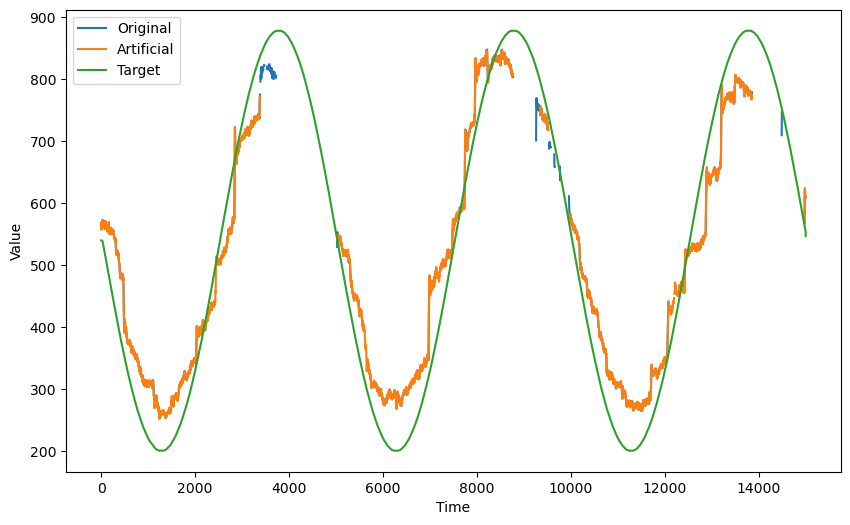

In [84]:
instance = 91
smoothpur = 1 # starts from 0
x_y_T = 1 # x= 0, Y= 1  Target =2
l_r = 1 # 0 = LEFT, 1 = RIGHT

plt.figure(figsize=(10, 6))
plt.plot(SmoothPur_11_12_Ar[instance][smoothpur][x_y_T][l_r], label='Original')
plt.plot(SmoothPur_11_12[instance][smoothpur][x_y_T][l_r], label='Artificial')
plt.plot(SmoothPur_11_12[instance][smoothpur][2][l_r], label='Target')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('HG032_v2_SPT_12.png')  # Saves as a PNG file
plt.show()

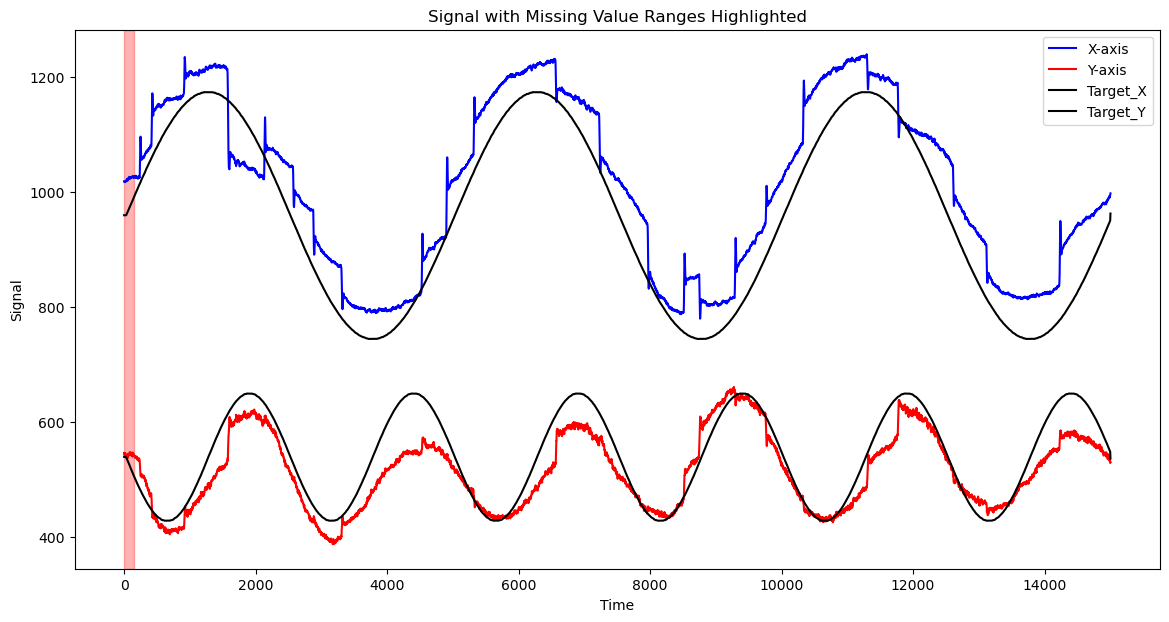

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the .dat files
eventL = pd.read_csv('J:\Imputation project/Artificial_blinks/HG032/SmoothPur_9/REvent.dat', header=None, names=['start', 'end', 'value'])
sigL = pd.read_csv('J:\Imputation project/Artificial_blinks/HG032/SmoothPur_9/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
Target = pd.read_csv('J:\Imputation project/Artificial_blinks/HG032/SmoothPur_9/target.dat', header=None, names=['X-axis', 'Y-axis'])

# Identify the ranges with missing values and modify the ranges
missing_ranges = eventL[eventL['value'] == 5].copy()
# missing_ranges['start'] -= 10
# missing_ranges['end'] += 10

# Plot the sigL data
plt.figure(figsize=(14, 7))
plt.plot(sigL['X-axis'], label='X-axis', color='blue')
plt.plot(sigL['Y-axis'], label='Y-axis', color='red')
plt.plot(Target['X-axis'], label='Target_X', color='black')
plt.plot(Target['Y-axis'], label='Target_Y', color='black')

# Highlight the missing ranges
for idx, row in missing_ranges.iterrows():
    plt.axvspan(row['start'], row['end'], color='red', alpha=0.3)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal with Missing Value Ranges Highlighted')
plt.legend()
plt.show()
